# MNistBayes Analysis

Author: Sayemum Hassan

Version: 10/5/2024

## Load and Prepare Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from nb_classifier import NBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Load MNIST dataset
X_train = np.load('MNIST_X_train.npy')
X_test = np.load('MNIST_X_test.npy')
y_train = np.load('MNIST_y_train.npy')
y_test = np.load('MNIST_y_test.npy')

# Reshape data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create the categorical flag array (False for all features as they are continuous)
X_categorical = np.array([False] * X_train.shape[1])

## Build Naive Bayes Model

In [4]:
# Initialize NB
nb = NBClassifier(smoothing_flag=True)
nb.fit(X_train, X_categorical, y_train)

# Predict on test data
y_pred = nb.predict(X_test)

# Evaluate model
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5639


## Confusion Matrix

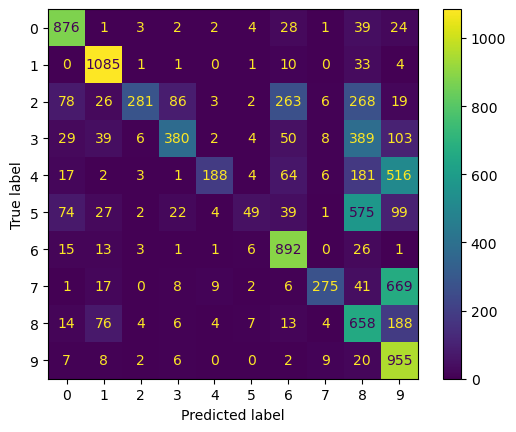

In [5]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

## Matrix Results
Based on this matrix, where we compare the actual labels with the predicted labels, we can note some interesting things. The number on each cell represents how many times an accurate prediction was made with the predicted label compared to the actual label. For example, from the dataset, we were able to predict 876 times that the predicted label actually matched the digit 0. We see a diagonal trend in the matrix, which indicates that the model is performing well.

## Visualizations

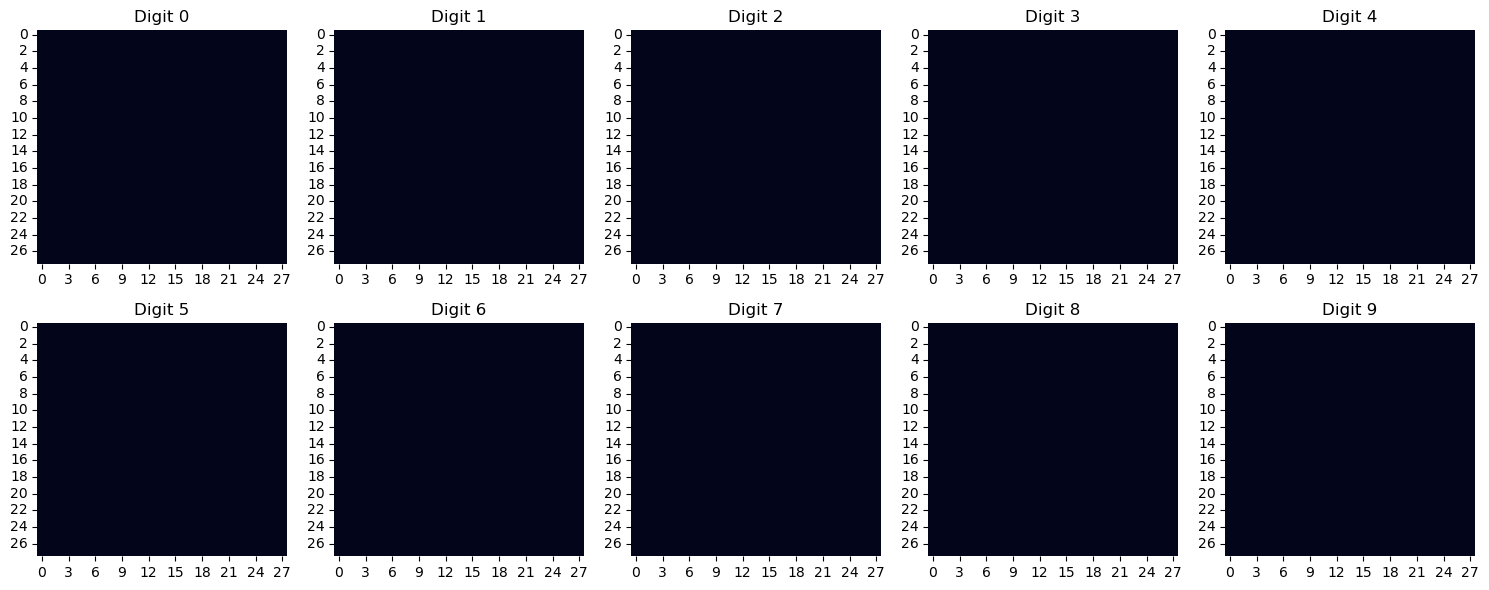

In [6]:
def plot_heatmap_for_digit(nb, digit, ax):
    mu_values = nb.feature_dists[digit]
    heatmap_data = np.zeros((28, 28))
    for i in range(28 * 28):
        mean, _ = mu_values[digit]
        heatmap_data[i // 28, i % 28] = mean
    sns.heatmap(heatmap_data, ax=ax, cbar=False)
    ax.set_title(f'Digit {digit}')

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for digit in range(10):
    plot_heatmap_for_digit(nb, digit, axs[digit // 5, digit % 5])

plt.tight_layout()
plt.show()

## Results



TypeError: loop of ufunc does not support argument 0 of type dict which has no callable exp method

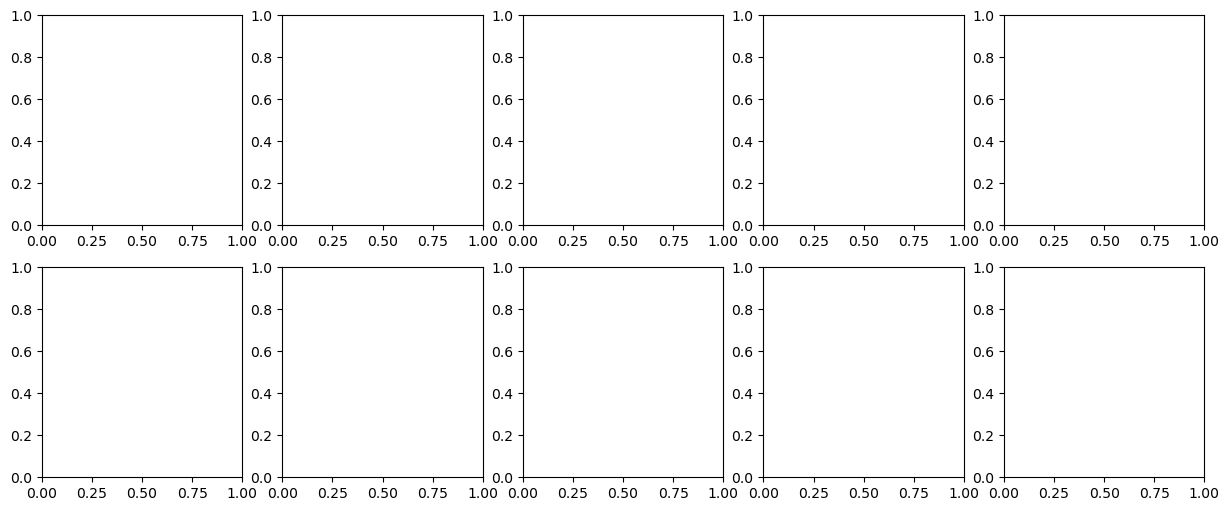

In [7]:
# Heatmaps for digits
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap_for_digit(nb, digit, ax):
    mu_values = nb.feature_dists[digit]  # log probability
    heatmap_data = np.exp(mu_values).reshape(28, 28)  # reshape back to 28x28 and take exp to get probabilities
    sns.heatmap(heatmap_data, ax=ax, cbar=False)
    ax.set_title(f'Digit {digit}')

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for digit in range(10):
    plot_heatmap_for_digit(nb, digit, axs[digit // 5, digit % 5])

plt.tight_layout()
plt.show()